In [26]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

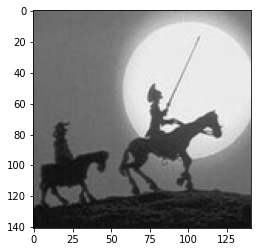

In [49]:
img = plt.imread("quijote.jpeg")
plt.imshow(img, cmap=cm.gray)
plt.show()

Observar que tenemos 3 dimensiones para los colores, pero los 3 contienen los mismos valores (pues la imagen es en escala de grises):

In [52]:
img.shape

(141, 141, 3)

In [53]:
# Check if third dimension of img contains 3 equal values for all pixels
print("Primer y segundo canal iguales:", np.all(img[:,:,0] == img[:,:,1]))
print("Primer y tercer canal iguales:", np.all(img[:,:,0] == img[:,:,2]))

Primer y segundo canal iguales: True
Primer y tercer canal iguales: True


Me quedo solo con alguno de los canales

In [54]:
A = img[:,:,0]
A.shape

(141, 141)

In [33]:
# Computer SVD
U, S, VT = np.linalg.svd(A)

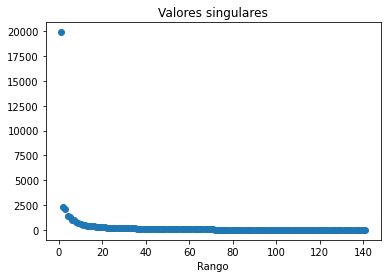

In [176]:
plt.scatter(range(1, len(S)+1), S)
plt.title("Valores singulares")
plt.xlabel("Rango")
plt.show()

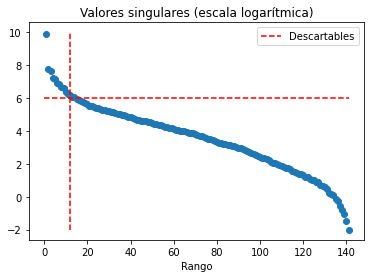

In [177]:
plt.scatter(range(1, len(S)+1), np.log(S))
plt.hlines(y=6, xmin=0, xmax=len(S), color="red", linestyle="--", label="Descartables")
plt.vlines(x=12, ymin=-2, ymax=10, color="red", linestyle="--")
plt.title("Valores singulares (escala logarítmica)")
plt.xlabel("Rango")
plt.legend()

plt.show()

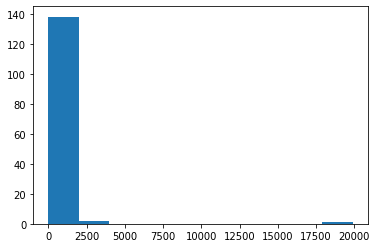

In [157]:
plt.hist(S)
plt.show()

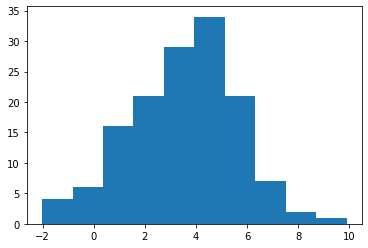

In [158]:
plt.hist(np.log(S))
plt.show()

![image.png](img/ej20.png)

In [62]:
def reducir_rango(A, r):
    # Remove all but r largest singular values
    shape_A = A.shape
    U, S, VT = np.linalg.svd(A)
    U_tilde = U[:, :r]
    S_tilde = S[:r]
    VT_tilde = VT[:r, :]
    return shape_A, U_tilde, S_tilde, VT_tilde

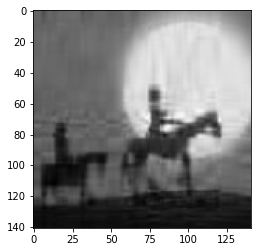

In [140]:
r = 10
shape_A, U_tilde, S_tilde, VT_tilde = reducir_rango(A, r)

A_red = U_tilde @ np.diag(S_tilde) @ VT_tilde

plt.imshow(A_red, cmap=cm.gray)
plt.show()

In [141]:
np.linalg.matrix_rank(A_red)

10

Notar que ahora las dimensiones de las matrices de la descomposicion tiene una dimensionalidad mucho menor a las originales (que eran cuadradas)

In [142]:
U_tilde.shape, S_tilde.shape, VT_tilde.shape

((141, 10), (10,), (10, 141))

Pero la dimension de la matriz de rango reducido (la imagen) sigue teniendo la misma dimensionalidad

In [143]:
A_red.shape

(141, 141)

In [144]:
from mpl_toolkits.axes_grid1 import ImageGrid


In [145]:
# Generate compressed images using reducir_rango for different values of r and plot them in a grid of images
def plot_compressed_images(A, r_values):
    # Plot compressed images for different values of r
    n_r = len(r_values)
    cols = np.sqrt(n_r).astype(int)
    rows = np.ceil(n_r / cols).astype(int)

    img_size = 5.0

    fig = plt.figure(figsize=(img_size*rows, img_size*cols))
    
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(rows, cols),  # creates 2x2 grid of axes
                 axes_pad=0.5,  # pad between axes in inch.
                 )

    images = []
    for i, r in enumerate(r_values):
        shape_A, U_tilde, S_tilde, VT_tilde = reducir_rango(A, r)
        A_red = U_tilde @ np.diag(S_tilde) @ VT_tilde
        images.append(A_red)

    for i, (ax, im) in enumerate(zip(grid, images)):
        # Iterating over the grid returns the Axes.
        ax.imshow(im, cmap=cm.gray)
        # add title
        ax.set_title("r = {}".format(r_values[i]))
    plt.show()

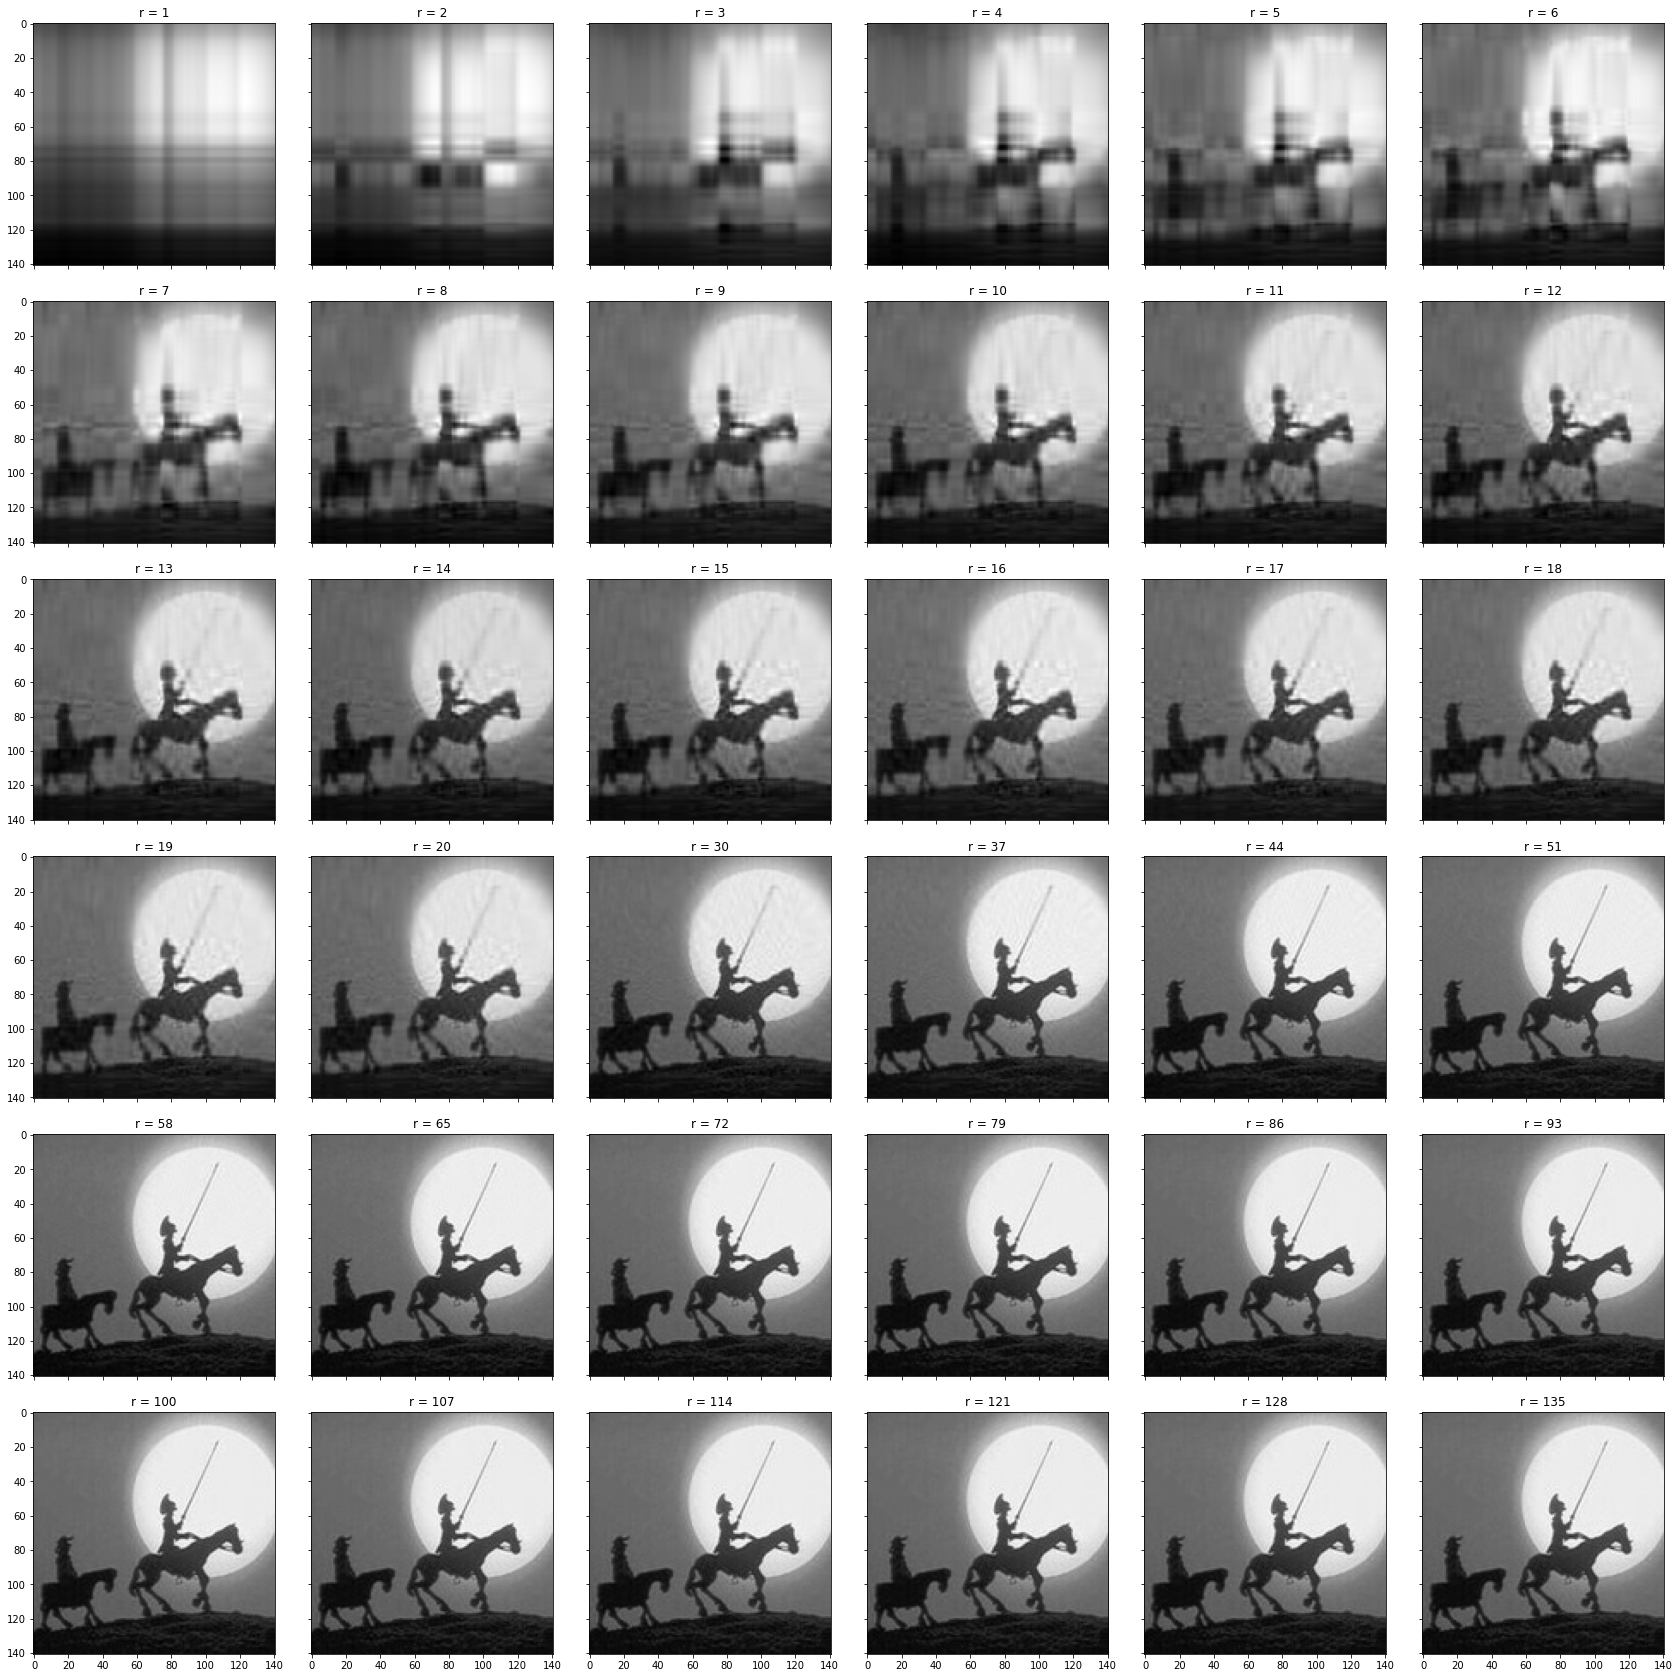

In [146]:
r_values = list(range(1, 21)) + np.arange(30, A.shape[0], step=(A.shape[0] - 30)//14).tolist()
plot_compressed_images(A, r_values)

El ejercicio 21 habla de  recuperar la dimensionalidad original de las matrices de la descomposicion con menor rango, pero llenar con ceros
esas matrices es lo mismo que hacer el producto de matrices directamente sin esas columnas/filas.

O sea que directamente podemos reconstruir la imagen multiplicando U_tilde por S_tilde por VT_tilde, sin necesidad de rellenar con ceros.

![ej22](img/ej22a.png)
![ej22](img/ej22b.png)

In [147]:
np.linalg.matrix_rank(A)

141

In [148]:
np.linalg.matrix_rank(A_red)

10

In [149]:
np.linalg.norm(A - A_red, ord=2) / np.linalg.norm(A, ord=2)

0.02650086861401448

In [150]:
S[r]/S[0]

0.026500868614014503

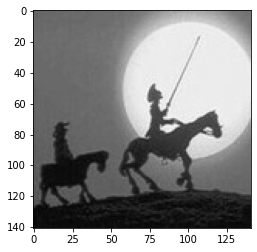

In [151]:
r = 100
shape_A, U_tilde, S_tilde, VT_tilde = reducir_rango(A, r)

A_red = U_tilde @ np.diag(S_tilde) @ VT_tilde

plt.imshow(A_red, cmap=cm.gray)
plt.show()

In [152]:
np.linalg.matrix_rank(A)

141

In [153]:
np.linalg.matrix_rank(A_red)

100

In [154]:
np.linalg.norm(A - A_red, ord=2) / np.linalg.norm(A, ord=2)

0.0005411453071974612

In [155]:
S[r]/S[0]

0.0005411453071974575

Ejercicio 23 es lo mismo para 3 canales de colores en vez de 1.

Se hace lo mismo procesando cada canal como una matriz diferente, y al final del proceso de compresión se vuelven ensamblar los 3 canales en una misma imagen.